## Práctica 3
## Regresión Lineal univariable
## Vianey Maravilla Pérez

**Especificaciones:**

**Utilizando el dataset_ejercicio_l_regresion_lineal.c realiza lo siguiente:**

**1.- Carga el dataset especificado**

- La columna size es la caracteristica de las casas
- La columna price es la salida a predecir

**2.- Mezcla los datos (set random_state=0) y separa el dataset en conjunto de entrenamiento (90 %) y conjunto de prueba (10%)**

**Utilizando los datos de entrenamiento realiza lo siguiente:**

- Considera como función de pérdida el error cuadrático medio (mse)
- Utiliza el gradiente descendiente para encontrar los pesos que minimicen la función de perdida
- Prueba con diferentes valores de alpha (tasa de aprendizaje) y número de iteraciones
- Calculas el mse

**Utilizando los datos de prueba realiza lo siguiente:**

- Predice los valores para las intancias de prueba
- Calcula el mse

**Evidencias:**

- Código fuente
- Un archivo en PDF con la siguiente información:
  - La gráfica de la línea ajustada generada por el conjunto de entrenamineto
  -La gráfica de la línea generada para el conjunto de prueba
  - El mse del conjunto de entrenamiento y el conjuto de prueba
  - Número de iteraciones y alpha

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [127]:
def F(w, X, y):
    return sum((w * x - y)**2 for x, y in zip(X, y))/len(y)

In [128]:
def dF(w, X, y):
    return sum(2*(w * x - y) * x for x, y in zip(X, y))/len(y)

In [129]:
# Carga del dataset proporcionado

def load_dataset(path):

    data = pd.read_csv(path)

    x = data['size']
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle = True, random_state=0)
    return [X_train, X_test, y_train, y_test]

In [130]:
X_train, X_test, y_train, y_test = load_dataset('./dataset/regresion.csv')

In [138]:
def lineas(points, w, iteration, line_color = None, line_style = 'dotted'):
    list_x = []
    list_y = []
    for index, tuple in enumerate(points):
        x = tuple[0]
        y = x * w
        list_x.append(x)
        list_y.append(y)
    x1.text(x,y, iteration, horizontalalignment='right')
    x1.plot(list_x, list_y, color = line_color, linestyle= line_style)

gradient = -1162.0
iteration 0: w = 0.01162, F(w) = 13.97
gradient = -562.1845384615385
iteration 1: w = 0.017241845384615387, F(w) = 3.952487831538461
gradient = -271.9892042041419
iteration 2: w = 0.019961737426656807, F(w) = 1.6076899289522626
gradient = -131.5904692186115
iteration 3: w = 0.02127764211884292, F(w) = 1.0588433579161511
gradient = -63.664481242342895
iteration 4: w = 0.02191428693126635, F(w) = 0.9303749051740825
gradient = -30.801365751824296
iteration 5: w = 0.022222300588784594, F(w) = 0.9003043094540717
gradient = -14.901937684315252
iteration 6: w = 0.02237131996562775, F(w) = 0.893265688628056
gradient = -7.2096720819615125
iteration 7: w = 0.022443416686447365, F(w) = 0.8916181594738711
gradient = -3.4880948122688986
iteration 8: w = 0.022478297634570054, F(w) = 0.8912325225172876
gradient = -1.6875671016742506
iteration 9: w = 0.022495173305586796, F(w) = 0.8911422565199272
gradient = -0.8164579450754559
iteration 10: w = 0.022503337885037552, F(w) = 0.891121

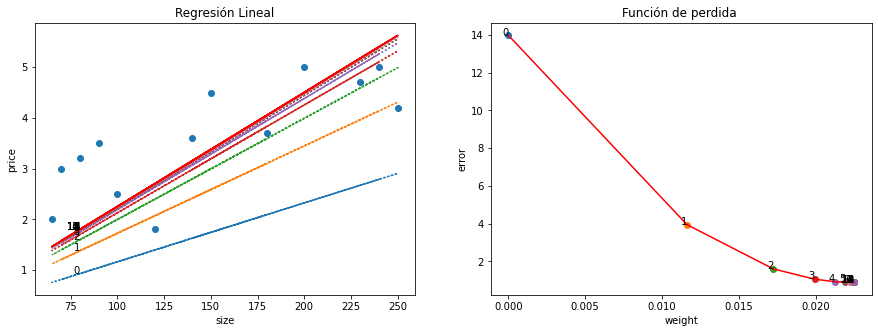

In [143]:
errors = []
_w = []	
iterations = 15

fig = plt.figure(figsize=(15, 5))
x1 = fig.add_subplot(1, 2, 1)
x1.set_title("Regresión Lineal")
x1.set(xlabel="size", ylabel="price")
x2 = fig.add_subplot(1, 2, 2)
x2.set_title("Función de perdida ")
x2.set(xlabel="weight", ylabel="error")

x1.scatter(np.array(X_train), y_train)

w= 0
alpha = 0.00001

for t in range(iterations):
    error = F(w, np.array(X_train), y_train)
    gradient = dF(w, np.array(X_train), y_train)
    print ('gradient = {}'.format(gradient))
    x2.scatter(w, error)
    x2.text(w, error, t, horizontalalignment='right')
    _w.append(w)
    
    errors.append(error)
    w = w - alpha * gradient
    
    print ('iteration {}: w = {}, F(w) = {}'.format(t, w, error))
    lineas(zip(np.array(X_train), y_train), w, t)

lineas(zip(np.array(X_train), y_train), w, t, 'red', 'solid')
x2.plot(list_w, list_error, color = 'red', linestyle = 'solid')

plt.show()

In [133]:
from tabulate import tabulate
resultado = []
pred = {'X_test': X_test,
        'X_test * w' : X_test * max(list_w),
        'Valor real' : y_test}
print(tabulate(pred,headers=['X_test', 'Valor predicho manualmente', 'Valor real de y_test'],tablefmt="grid", numalign="center"))




+----------+------------------------------+------------------------+
|  X_test  |  Valor predicho manualmente  |  Valor real de y_test  |
+==========+==============================+========================+
|   150    |           3.37652            |          3.5           |
+----------+------------------------------+------------------------+
|   130    |           2.92632            |          2.8           |
+----------+------------------------------+------------------------+
